# Явная схема


In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def f(x , y):
  if ((x - 1)**2 + (y - 1)**2) <= (1/4)**2:
    return 1;
  else: return 0

В явной схеме нет необходимости решать систему, необходисо просто выразить переменную на необходимом слое через предыдущий, единственную сложность составляет умножение матрицы на вектор


In [44]:
n = 100
N = n * n
dx = 10
dy = 1
h = 1 / n
delta = 0.01 * (h ** 2)

In [45]:
def matvec(u, n, dx, dy, h):
    N = n * n
    result = u * 2 * (dx + dy)
    p = np.full(N, -dy)
    p[n-1::n] = 0
    result[:-1] += np.multiply(p[:-1], u[1:])
    result[1:] += np.multiply(p[:-1], u[:-1])
    p = np.full(N - n, -dx)
    result[:-n] += np.multiply(p, u[n:])
    result[n:] += np.multiply(p, u[:-n])
    return result * (1 / (h ** 2))


In [53]:
ans = np.zeros(N)

In [54]:
prev = []

In [55]:
count = 0
for i in range(1,n+1):
  for j in range(1, n+1):
    ans[count] = f(j*h, i*h)
    count+=1

prev.append(ans)

In [49]:
print(int(0.01/delta))

9999


In [56]:
for i in range(int(0.01/delta)):
  prev.append(prev[-1] - delta*matvec(prev[-1], n, dx, dy, h))

Картинка для x^2 + y^2 <= 1

10000


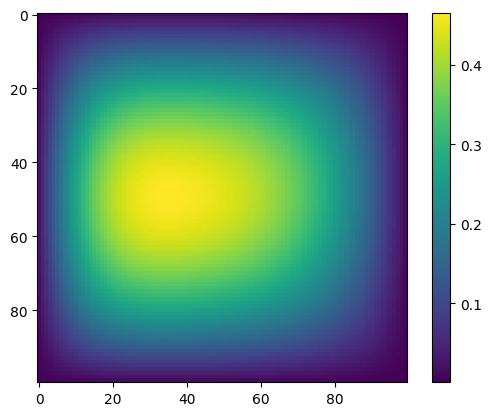

In [51]:
plt.imshow(prev[-1].reshape(n, n))
print(len(prev))
plt.colorbar()

10000


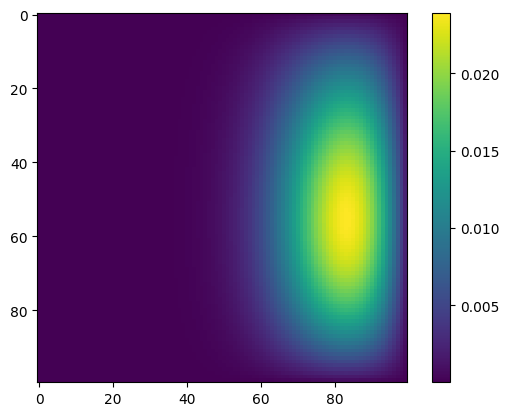

In [57]:
plt.imshow(prev[-1].reshape(n, n))
print(len(prev))
plt.colorbar()

А это (x - 1)^2 + (y - 1)^2 <= (1/4)^2